# Understanding Dataset Loading in depth

Author: YinTaiChen

Reference 1: http://pytorch.org/docs/master/_modules/torch/utils/data/dataset.html#Dataset

Reference 2: https://github.com/pytorch/vision/issues/81

Reference 3: http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

import torch
import torch.utils.data as Data
import torchvision
from torchvision import transforms

In [3]:
class Dataset(object):
    """An abstract class representing a Dataset.

    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])

In [4]:
import torch.utils.data as data

from PIL import Image
import os
import os.path

def default_loader(path):
	return Image.open(path).convert('RGB')

def default_flist_reader(flist):
	"""
	flist format: impath label\nimpath label\n ...(same to caffe's filelist)
	"""
	imlist = []
	with open(flist, 'r') as rf:
		for line in rf.readlines():
			impath, imlabel = line.strip().split()
			imlist.append( (impath, int(imlabel)) )
					
	return imlist

class ImageFilelist(data.Dataset):
	def __init__(self, root, flist, transform=None, target_transform=None,
			flist_reader=default_flist_reader, loader=default_loader):
		self.root   = root
		self.imlist = flist_reader(flist)		
		self.transform = transform
		self.target_transform = target_transform
		self.loader = loader

	def __getitem__(self, index):
		impath, target = self.imlist[index]
		img = self.loader(os.path.join(self.root,impath))
		if self.transform is not None:
			img = self.transform(img)
		if self.target_transform is not None:
			target = self.target_transform(target)
		
		return img, target

	def __len__(self):
		return len(self.imlist)

In [5]:
file = open("dataset.txt", "r")

In [6]:
print(file.read())

bird_1.jpg 0
bird_2.jpg 0
dog_1.jpg 1
dog_2.jpg 1
cat_1.jpg 2
cat_2.jpg 2



In [7]:
transform = transforms.Compose(
    [transforms.Scale(size=(256,256)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [8]:
trainset = ImageFilelist(root="./train", flist="dataset.txt", transform=transform)

In [9]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=3, shuffle=True, num_workers=3)

In [10]:
dataiter = iter(trainloader)

In [11]:
images, labels = dataiter.next()

In [12]:
type(images), type(labels)

(torch.FloatTensor, torch.LongTensor)

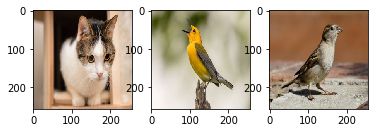

In [13]:
for i in range(3):
    image = images[i]
    image = image / 2 + 0.5
    np_array = image.numpy()
    plt.subplot(131+i)
    plt.imshow(np.transpose(np_array, (1,2,0)))

In [14]:
for i in range(3):
    print(labels[i])

2
0
0
